In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns; sns.set()


In [2]:
births = pd.read_csv('births.csv')
births.shape

(15547, 5)

## Taking a look at the data, we see that it’s relatively simple—it contains the number of births grouped by date and gender

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


## Using a pivot table and setting the index to year we can see the entire year by year layout.

In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(births, index='year', columns='gender', aggfunc=sum)

births              day          decade         month      
gender        F        M       F       M       F       M     F     M
year                                                                
1969    1753634  1846572  7140.0  7140.0  752640  752640  2496  2496
1970    1819164  1918636  7140.0  7140.0  756480  756480  2496  2496
1971    1736774  1826774  7048.0  7111.0  750570  754510  2486  2494
1972    1592347  1673888  7109.0  7079.0  754510  752540  2494  2488
1973    1533102  1613023  7017.0  7079.0  748600  752540  2477  2492
1974    1543005  1627626  7110.0  7110.0  754510  754510  2494  2494
1975    1535546  1618010  7011.0  6980.0  752540  750570  2484  2481
1976    1547613  1628863  7078.0  6918.0  752540  746630  2485  2471
1977    1623363  1708796  7041.0  6821.0  754510  744660  2492  2481
1978    1626324  1711976  6911.0  6744.0  750570  748600  2486  2483
1979    1705837  1793958  6431.0  6728.0  732840  738750  2434  2452
1980    1762459  1855522  6658.0  6361.0  742500  736560  2448  2427
1981    1772037  1863478  6431.0  6530.0  736560  738540  2426  2439
1982    1797239  1888218  6530.0  6728.0  738540  742500  2436  2446
1983    1775299  1867522  6728.0  6629.0  742500  740520  2441  2432
1984    1791802  1881766  6460.0  6559.0  738540  740520  2432  2426
1985    1834774  1930290  6134.0  6035.0  730620  728640  2397  2396
1986    1833708  1926987  5936.0  6134.0  726660  730620  2393  2414
1987    1860111  1953105  5936.0  5837.0  726660  724680  2389  2384
1988    1909210  2004583  6163.0  6064.0  732600  730620  2402  2403
1989    1973712  2071981     0.0     0.0   23760   23760    78    78
1990    2030966  2131951     0.0     0.0   23880   23880    78    78
1991    2011601  2103741     0.0     0.0   23880   23880    78    78
1992    1985118  2084310     0.0     0.0   23880   23880    78    78
1993    1953456  2051067     0.0     0.0   23880   23880    78    78
1994    1932234  2024691     0.0     0.0   23880   23880    78    78
1995    1904871  1998141     0.0     0.0   23880   23880    78    78
1996    1902664  1992210     0.0     0.0   23880   23880    78    78
1997    1896928  1987401     0.0     0.0   23880   23880    78    78
1998    1927106  2018086     0.0     0.0   23880   23880    78    78
1999    1934510  2028955     0.0     0.0   23880   23880    78    78
2000    1984255  2079568     0.0     0.0   24000   24000    78    78
2001    1970770  2060761     0.0     0.0   24000   24000    78    78
2002    1966519  2060857     0.0     0.0   24000   24000    78    78
2003    1999387  2096705     0.0     0.0   24000   24000    78    78
2004    2010710  2108197     0.0     0.0   24000   24000    78    78
2005    2022892  2122727     0.0     0.0   24000   24000    78    78
2006    2084957  2188268     0.0     0.0   24000   24000    78    78
2007    2111890  2212118     0.0     0.0   24000   24000    78    78
2008    2077929  2177227     0.0     0.0   24000   24000    78    78

## We can start to understand this data a bit more by using a pivot table. Let’s add a decade column, and take a look at male and female births as a function of decade.

In [5]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(births, index='decade', columns='gender', aggfunc=sum)

births                day           month            year         
gender         F         M        F        M      F      M        F        M
decade                                                                      
1960     1753634   1846572   7140.0   7140.0   2496   2496   756096   756096
1970    16263075  17121550  69896.0  69710.0  24828  24832  7524768  7516855
1980    18310351  19243452  56976.0  56877.0  21842  21845  6652359  6650377
1990    19479454  20420553      0.0      0.0    780    780   239340   239340
2000    18229309  19106428      0.0      0.0    702    702   216432   216432

## We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year.

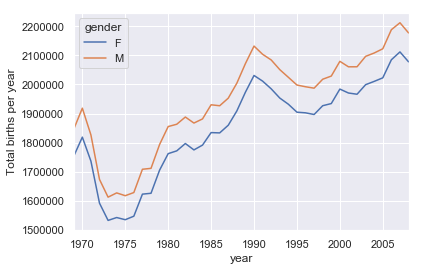

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use seaborn style
births.pivot_table('births', index='year', columns='gender', aggfunc=sum).plot()
plt.ylabel('Total births per year');

## With a simple pivot table and plot() method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.¶

# Further data exploration

## Though this doesn’t necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point. We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we’ll do this via a robust sigma-clipping operation:

In [7]:
births.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

## This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [8]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

## Next we set the day column to integers; previously it had been a string because some columns in the dataset contained the value 'null':

In [10]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

## Finally, we can combine the day, month, and year to create a Date index. This allows us to quickly compute the weekday corresponding to each row:

In [11]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

In [12]:
births['dayofweek'] = births.index.dayofweek

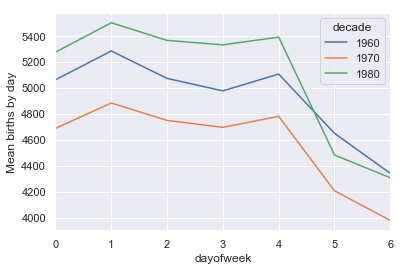

In [13]:
# Using this we can plot births by weekday for several decades
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.ylabel('Mean births by day');

## Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.¶

## Another interesting view is to plot the mean number of births by the day of the year.

## Let’s first group the data by month and day separately:

In [14]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

## The result is a multi-index over months and days. To make this easily plottable, let’s turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [15]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

## Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data and it reveals some interesting finds.

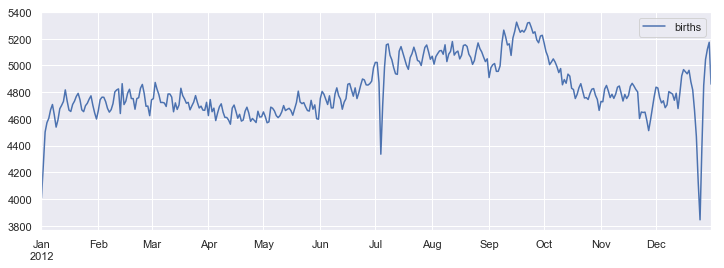

In [16]:
# plot the results
fig, ax, = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year’s Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births. For more discussion on this trend, see the analysis and links in Andrew Gelman’s blog post on the subject.